<a href="https://colab.research.google.com/github/mwithgod3952/jh_-Statistical_Theory/blob/master/Major_difference_between_histogram%2C_countplot_and_distplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### ***Study _ 변수(Variable) 성질에 따른 시각화 방안 적합도***

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

##### ***Continous variable***

    - 연속형 확률변수의 경우 Histogram은 각 값들이 얼마나 frequent하게
    분포되어있는지를 확인하도록 돕는다.
    여러 값이 독립적으로 존재할 때, 효율적으로 값들의 분포성질을 파악하기 위해 모든 값들을 나열하기보단,
    값을 구간으로 나누어, 구간의 density를 확인하는 것이 성질을 파악하는 일에 효율적일 수 있다.
    이를 위해, bin 값은, 연속형 값들의 구간을 설정하며, 결과적으로 이는 edge값이 되어, 값의 단계별 값의 frequency를 알게끔 돕는다.



In [26]:
np.random.seed(0)
x = np.random.rand(100)*100

bins = np.arange(0,101, 10)
n_array = np.histogram(x, bins=bins)
hist = n_array[0]
edges = n_array[1]

# print("x", x)
print("bins : ", np.arange(0,101, 10))
print("hist : ", n_array[0] )
print("edges : ", n_array[1])

bins :  [  0  10  20  30  40  50  60  70  80  90 100]
hist :  [12 13  9  7 10 11 15  8  6  9]
edges :  [  0  10  20  30  40  50  60  70  80  90 100]


###### ***Bar chart를 통한 'Histogram' 구현***

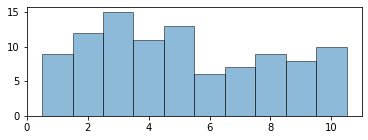

In [64]:
plt.figure(figsize=(6, 2))
plt.bar(edges[:-1], 
        hist, 
        align="edge", 
        ec="k", 
        width=np.diff(edges), 
        alpha=0.5)
plt.show();

***시각화 도구 Matplotlib를 통한 'Histogram' 구현***

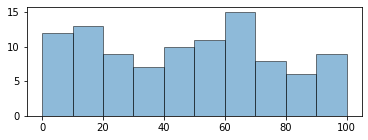

In [65]:
plt.figure(figsize=(6, 2))
plt.hist(x, bins=np.arange(0,101,10), ec="k", alpha=0.5)
plt.show()

    - Seaborn의 distplot은 기본적으로 동일하나, ked(kernel density estimate)를 통해, 일련의 '추이곡선'으로 '히스토그램'을 감쌀 수 있다.

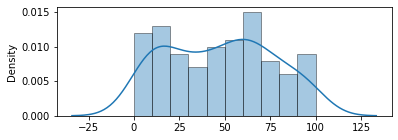

In [66]:
plt.figure(figsize=(6, 2))
sns.distplot(x, bins=np.arange(0,101,10), kde=True, hist_kws=dict(ec="k"))
plt.show(sns)

##### ***Discrete variable***

    - 이산변수에 대하여 'Histogram'은 적합하지 못하다.
    만약, 이산변수에 대하여 'Histogram'을 계산한다면, bin값의 경우 관측값 간의 사이값이 될 것이다.

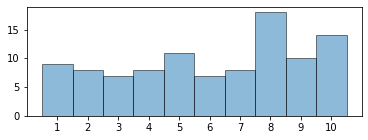

In [118]:
np.random.seed(1)
x1 = np.random.randint(1,11,100)
hist, edges = np.histogram(x1, bins=np.arange(1,12)-0.5)

plt.figure(figsize=(6, 2))
plt.bar(edges[:-1], hist, align="edge", ec="k", width=np.diff(edges), alpha=0.5)
plt.xticks(np.arange(1,11))
plt.show()

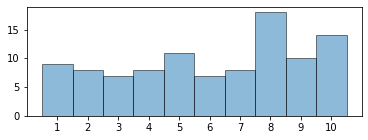

In [119]:
u, counts = np.unique(x1, return_counts=True)

plt.figure(figsize=(6, 2))
plt.bar(u, counts, align="center", ec="k", width=1, alpha=0.5)
plt.xticks(u)
plt.show()

    - 위는, '이산변수'에 대하여, 'Histogram'과 'Count plot'을 Bar chart로 시각화해 본 것이며 결과적으로, 위의 사례에서 두 결과는 완전하게 같다.

    반면, 아래의 경우, 두 래프가 다른 결과를 보여주는 것을 확인할 수 있다.
    'Histogram'과 'Count plot'의 가장 큰 차이는 bin의 차이라고 할 수 있다.
    위에서 거론한 바와 같이, 'Histogram'이 Frequent를 표현하는 방식은 bin을 통하여, 일괄적으로 X axis를 동일구간으로 분할 및 edge를 생성하여 시각화하는 방식이기 때문에, 변수 안에 특정 값이 포함되지 않는다고 할지라도 특정, edge는 그대로 남아있다.

    이런 이유로, 경우에 따라_ 이상변수의 경우 Histogram을 통한 분포 시각화는 적절하지 않을 수 있다. 


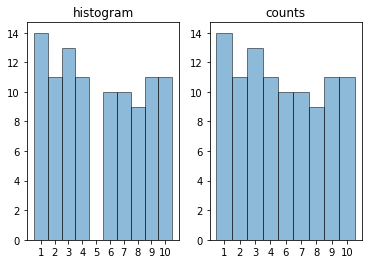

In [120]:
x2 = np.random.choice([1,2,3,4,6,7,8,9,10], size=100)

plt.subplot(1,2,1)
plt.title("histogram")
hist, edges = np.histogram(x2, bins=np.arange(1,12)-0.5)
plt.bar(edges[:-1], hist, align="edge", ec="k", width=np.diff(edges), alpha=0.5)
plt.xticks(np.arange(1,11))

plt.subplot(1,2,2)
plt.title("counts")
u, counts = np.unique(x2, return_counts=True)
plt.bar(u.astype(str), counts, align="center", ec="k", width=1, alpha=0.5)

plt.show()

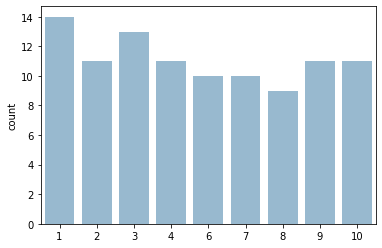

In [71]:
sns.countplot(x2, color="C0", alpha=0.5)